In [57]:
import numpy as np
import matplotlib
matplotlib.use('TkAgg')
from matplotlib import pyplot as plt

In [58]:
def plt_data_t(title, number_of_points):
    plt.title(title, fontsize=10)
    plt.draw()
    pts = np.asarray(plt.ginput(number_of_points, timeout=-1))
    return pts

In [59]:
def populate_data():
    positive, negative = get_data(10)
    X = list()
    Y = list()
    for i in range(len(positive)):
        data = [positive[i][0], positive[i][1], 1]
        X.append(np.array(data))
        Y.append(1)
    for i in range(len(negative)):
        data = [negative[i][0], negative[i][1], 1]
        X.append(np.array(data))
        Y.append(-1)
    return positive, negative, X, Y

In [60]:
def get_data(number_of_points):
    plt.clf()
    plt.setp(plt.gca(), autoscale_on=False)
    positive = plt_data_t("Positive Class", number_of_points)
    negative = plt_data_t("Negative Class", number_of_points)

    plt.title("DATA", fontsize=10)
    plt.scatter(positive[:, 0], positive[:, 1], marker="o")
    plt.scatter(negative[:, 0], negative[:, 1], marker="x")
    plt.show()
    return positive, negative

#### Get Positive and Negative Data Points, This block of code will load a Interactive GUI which will wait for user to provide input

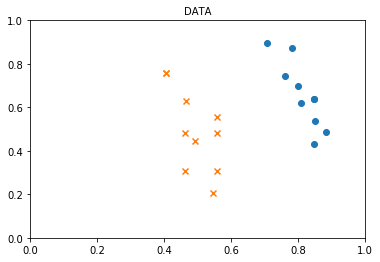

In [61]:
positive, negative, X, Y = populate_data()

$$w^T * x =\begin{cases}\text{positive values } & w^T* x \geq 0\\\text{negative values } & w^T* x <  0\end{cases}$$

In [62]:
def decision_rule(w, x):
    return np.dot(w, x)

 $$\text{sigmoid = }\frac{1}{1+ e^{- (w^{T}*x *y)}}$$

In [63]:
def sigmoid(w, x, y):
    z = decision_rule(w, x)
    return 1 / (1 + np.exp(-z * y))

In [64]:
def expo(w, x, y):
    z = decision_rule(w, x)
    return np.exp(-z * y)

$$\text{gradient = }(\frac{1}{1+ e^{- (w^{T}*x *y)}}) *  (e^{- (w^{T}*x *y)}) * (-y*x)$$

In [65]:
def gradient(w, x, y):
    return sigmoid(w, x, y) * expo(w, x, y) * (-y * x)

$$\text{loss = } \log\frac{1}{1+ e^{- (w^{T}*x *y)}}$$


In [66]:
def loss(w, x, y):
    return np.log(1 + expo(w, x, y)).mean()

In [71]:
def train(w, lr, num_iter):
    for num_iter in range(num_iter):
        for iterator in range(len(X)):
            x = X[iterator]
            y = Y[iterator]
            w -= lr * gradient(w, x, y)
        print("Step: {} Loss : {}".format(num_iter, loss(w, x, y)))
    return w

In [72]:
W = train(np.array([0.0, 0.0, 0.0]), 0.001, 3000)

Step: 0 Loss : 0.6936538228810805
Step: 1 Loss : 0.6941551960007089
Step: 2 Loss : 0.6946513405920575
Step: 3 Loss : 0.6951422970888226
Step: 4 Loss : 0.6956281056849264
Step: 5 Loss : 0.6961088063343283
Step: 6 Loss : 0.6965844387508794
Step: 7 Loss : 0.6970550424082232
Step: 8 Loss : 0.6975206565397429
Step: 9 Loss : 0.6979813201385497
Step: 10 Loss : 0.6984370719575157
Step: 11 Loss : 0.6988879505093447
Step: 12 Loss : 0.6993339940666864
Step: 13 Loss : 0.699775240662286
Step: 14 Loss : 0.7002117280891742
Step: 15 Loss : 0.7006434939008906
Step: 16 Loss : 0.7010705754117466
Step: 17 Loss : 0.7014930096971173
Step: 18 Loss : 0.7019108335937722
Step: 19 Loss : 0.7023240837002345
Step: 20 Loss : 0.7027327963771726
Step: 21 Loss : 0.7031370077478241
Step: 22 Loss : 0.7035367536984455
Step: 23 Loss : 0.7039320698787936
Step: 24 Loss : 0.7043229917026339
Step: 25 Loss : 0.7047095543482734
Step: 26 Loss : 0.705091792759124
Step: 27 Loss : 0.7054697416442861
Step: 28 Loss : 0.70584343547915

Step: 357 Loss : 0.7195052409489503
Step: 358 Loss : 0.7194143947186122
Step: 359 Loss : 0.7193233314003568
Step: 360 Loss : 0.7192320531420552
Step: 361 Loss : 0.7191405620726188
Step: 362 Loss : 0.719048860302164
Step: 363 Loss : 0.718956949922176
Step: 364 Loss : 0.7188648330056719
Step: 365 Loss : 0.7187725116073624
Step: 366 Loss : 0.7186799877638109
Step: 367 Loss : 0.7185872634935926
Step: 368 Loss : 0.7184943407974517
Step: 369 Loss : 0.7184012216584564
Step: 370 Loss : 0.7183079080421554
Step: 371 Loss : 0.7182144018967281
Step: 372 Loss : 0.7181207051531402
Step: 373 Loss : 0.7180268197252898
Step: 374 Loss : 0.7179327475101609
Step: 375 Loss : 0.7178384903879683
Step: 376 Loss : 0.7177440502223059
Step: 377 Loss : 0.7176494288602917
Step: 378 Loss : 0.7175546281327118
Step: 379 Loss : 0.7174596498541637
Step: 380 Loss : 0.7173644958231973
Step: 381 Loss : 0.7172691678224565
Step: 382 Loss : 0.7171736676188175
Step: 383 Loss : 0.7170779969635271
Step: 384 Loss : 0.71698215759

Step: 690 Loss : 0.6844688595726603
Step: 691 Loss : 0.6843604434245406
Step: 692 Loss : 0.6842520393359919
Step: 693 Loss : 0.6841436474127492
Step: 694 Loss : 0.684035267759559
Step: 695 Loss : 0.683926900480187
Step: 696 Loss : 0.6838185456774284
Step: 697 Loss : 0.6837102034531148
Step: 698 Loss : 0.6836018739081237
Step: 699 Loss : 0.6834935571423869
Step: 700 Loss : 0.6833852532548991
Step: 701 Loss : 0.6832769623437251
Step: 702 Loss : 0.6831686845060101
Step: 703 Loss : 0.6830604198379854
Step: 704 Loss : 0.6829521684349779
Step: 705 Loss : 0.6828439303914187
Step: 706 Loss : 0.6827357058008495
Step: 707 Loss : 0.6826274947559318
Step: 708 Loss : 0.6825192973484541
Step: 709 Loss : 0.6824111136693392
Step: 710 Loss : 0.682302943808653
Step: 711 Loss : 0.6821947878556113
Step: 712 Loss : 0.6820866458985876
Step: 713 Loss : 0.6819785180251208
Step: 714 Loss : 0.6818704043219216
Step: 715 Loss : 0.6817623048748811
Step: 716 Loss : 0.6816542197690778
Step: 717 Loss : 0.681546149088

Step: 1028 Loss : 0.6488632052763903
Step: 1029 Loss : 0.6487614400568172
Step: 1030 Loss : 0.6486596969195981
Step: 1031 Loss : 0.6485579758646198
Step: 1032 Loss : 0.6484562768917208
Step: 1033 Loss : 0.6483546000006927
Step: 1034 Loss : 0.6482529451912797
Step: 1035 Loss : 0.6481513124631801
Step: 1036 Loss : 0.648049701816045
Step: 1037 Loss : 0.6479481132494813
Step: 1038 Loss : 0.6478465467630493
Step: 1039 Loss : 0.647745002356265
Step: 1040 Loss : 0.6476434800286001
Step: 1041 Loss : 0.6475419797794817
Step: 1042 Loss : 0.6474405016082935
Step: 1043 Loss : 0.6473390455143766
Step: 1044 Loss : 0.6472376114970283
Step: 1045 Loss : 0.647136199555504
Step: 1046 Loss : 0.6470348096890166
Step: 1047 Loss : 0.6469334418967376
Step: 1048 Loss : 0.646832096177797
Step: 1049 Loss : 0.6467307725312841
Step: 1050 Loss : 0.6466294709562475
Step: 1051 Loss : 0.646528191451695
Step: 1052 Loss : 0.6464269340165961
Step: 1053 Loss : 0.6463256986498789
Step: 1054 Loss : 0.6462244853504339
Step: 

Step: 1358 Loss : 0.6164646545167163
Step: 1359 Loss : 0.6163700162399461
Step: 1360 Loss : 0.6162753988369264
Step: 1361 Loss : 0.6161808023026877
Step: 1362 Loss : 0.6160862266322603
Step: 1363 Loss : 0.6159916718206724
Step: 1364 Loss : 0.6158971378629503
Step: 1365 Loss : 0.6158026247541203
Step: 1366 Loss : 0.6157081324892064
Step: 1367 Loss : 0.6156136610632316
Step: 1368 Loss : 0.6155192104712176
Step: 1369 Loss : 0.615424780708185
Step: 1370 Loss : 0.6153303717691522
Step: 1371 Loss : 0.6152359836491376
Step: 1372 Loss : 0.6151416163431581
Step: 1373 Loss : 0.6150472698462282
Step: 1374 Loss : 0.6149529441533632
Step: 1375 Loss : 0.6148586392595755
Step: 1376 Loss : 0.614764355159878
Step: 1377 Loss : 0.6146700918492807
Step: 1378 Loss : 0.6145758493227942
Step: 1379 Loss : 0.6144816275754268
Step: 1380 Loss : 0.6143874266021864
Step: 1381 Loss : 0.6142932463980798
Step: 1382 Loss : 0.6141990869581129
Step: 1383 Loss : 0.6141049482772899
Step: 1384 Loss : 0.6140108303506155
Ste

Step: 1760 Loss : 0.5800487931339603
Step: 1761 Loss : 0.5799621442368874
Step: 1762 Loss : 0.5798755142247581
Step: 1763 Loss : 0.5797889030927883
Step: 1764 Loss : 0.579702310836195
Step: 1765 Loss : 0.5796157374501969
Step: 1766 Loss : 0.579529182930012
Step: 1767 Loss : 0.5794426472708615
Step: 1768 Loss : 0.5793561304679667
Step: 1769 Loss : 0.5792696325165501
Step: 1770 Loss : 0.5791831534118349
Step: 1771 Loss : 0.5790966931490462
Step: 1772 Loss : 0.5790102517234091
Step: 1773 Loss : 0.5789238291301516
Step: 1774 Loss : 0.5788374253645006
Step: 1775 Loss : 0.5787510404216856
Step: 1776 Loss : 0.5786646742969367
Step: 1777 Loss : 0.5785783269854848
Step: 1778 Loss : 0.5784919984825627
Step: 1779 Loss : 0.5784056887834033
Step: 1780 Loss : 0.5783193978832412
Step: 1781 Loss : 0.5782331257773118
Step: 1782 Loss : 0.5781468724608522
Step: 1783 Loss : 0.5780606379291
Step: 1784 Loss : 0.5779744221772939
Step: 1785 Loss : 0.5778882252006735
Step: 1786 Loss : 0.5778020469944805
Step: 

Step: 2100 Loss : 0.5516460484097692
Step: 2101 Loss : 0.5515655518684806
Step: 2102 Loss : 0.5514850726494195
Step: 2103 Loss : 0.5514046107481796
Step: 2104 Loss : 0.5513241661603548
Step: 2105 Loss : 0.5512437388815411
Step: 2106 Loss : 0.5511633289073354
Step: 2107 Loss : 0.5510829362333343
Step: 2108 Loss : 0.5510025608551371
Step: 2109 Loss : 0.5509222027683434
Step: 2110 Loss : 0.5508418619685546
Step: 2111 Loss : 0.5507615384513722
Step: 2112 Loss : 0.5506812322123998
Step: 2113 Loss : 0.550600943247242
Step: 2114 Loss : 0.5505206715515036
Step: 2115 Loss : 0.550440417120791
Step: 2116 Loss : 0.5503601799507122
Step: 2117 Loss : 0.5502799600368755
Step: 2118 Loss : 0.5501997573748906
Step: 2119 Loss : 0.5501195719603686
Step: 2120 Loss : 0.5500394037889219
Step: 2121 Loss : 0.5499592528561632
Step: 2122 Loss : 0.549879119157706
Step: 2123 Loss : 0.5497990026891666
Step: 2124 Loss : 0.5497189034461611
Step: 2125 Loss : 0.5496388214243066
Step: 2126 Loss : 0.5495587566192217
Step

Step: 2452 Loss : 0.5243502898398125
Step: 2453 Loss : 0.524275626336469
Step: 2454 Loss : 0.5242009786711108
Step: 2455 Loss : 0.5241263468397089
Step: 2456 Loss : 0.5240517308382355
Step: 2457 Loss : 0.5239771306626634
Step: 2458 Loss : 0.5239025463089668
Step: 2459 Loss : 0.5238279777731212
Step: 2460 Loss : 0.5237534250511026
Step: 2461 Loss : 0.5236788881388876
Step: 2462 Loss : 0.5236043670324556
Step: 2463 Loss : 0.5235298617277852
Step: 2464 Loss : 0.5234553722208566
Step: 2465 Loss : 0.5233808985076519
Step: 2466 Loss : 0.5233064405841531
Step: 2467 Loss : 0.5232319984463438
Step: 2468 Loss : 0.5231575720902083
Step: 2469 Loss : 0.5230831615117324
Step: 2470 Loss : 0.5230087667069027
Step: 2471 Loss : 0.5229343876717065
Step: 2472 Loss : 0.5228600244021331
Step: 2473 Loss : 0.5227856768941717
Step: 2474 Loss : 0.5227113451438128
Step: 2475 Loss : 0.5226370291470489
Step: 2476 Loss : 0.5225627288998727
Step: 2477 Loss : 0.5224884443982775
Step: 2478 Loss : 0.5224141756382585
St

Step: 2804 Loss : 0.4990187523277702
Step: 2805 Loss : 0.49894942227971606
Step: 2806 Loss : 0.49888010671433586
Step: 2807 Loss : 0.4988108056279543
Step: 2808 Loss : 0.49874151901689845
Step: 2809 Loss : 0.4986722468774953
Step: 2810 Loss : 0.498602989206073
Step: 2811 Loss : 0.4985337459989606
Step: 2812 Loss : 0.49846451725248836
Step: 2813 Loss : 0.49839530296298756
Step: 2814 Loss : 0.49832610312678915
Step: 2815 Loss : 0.4982569177402275
Step: 2816 Loss : 0.4981877467996351
Step: 2817 Loss : 0.49811859030134864
Step: 2818 Loss : 0.498049448241703
Step: 2819 Loss : 0.4979803206170358
Step: 2820 Loss : 0.4979112074236847
Step: 2821 Loss : 0.4978421086579873
Step: 2822 Loss : 0.49777302431628523
Step: 2823 Loss : 0.4977039543949185
Step: 2824 Loss : 0.4976348988902288
Step: 2825 Loss : 0.4975658577985588
Step: 2826 Loss : 0.497496831116252
Step: 2827 Loss : 0.49742781883965315
Step: 2828 Loss : 0.49735882096510803
Step: 2829 Loss : 0.49728983748896327
Step: 2830 Loss : 0.4972208684

In [69]:
def slope_intercept():
    a, b, c = tuple(W)
    return -a / b, -c / b

def plt_decision_boundary():
    slope, intercept = slope_intercept()

    x = np.linspace(0, 1)
    y = slope * x + intercept

    plt.plot(x, y, "-r", label="decision boundary")

    plt.scatter(positive[:, 0], positive[:, 1], marker="o")
    plt.scatter(negative[:, 0], negative[:, 1], marker="x")
    plt.title("Graph of Decision Boundary")
    plt.xlabel("x", color="#1C2833")
    plt.ylabel("y", color="#1C2833")
    plt.legend(loc="upper left")
    plt.axis([0.0, 1, 0, 1])

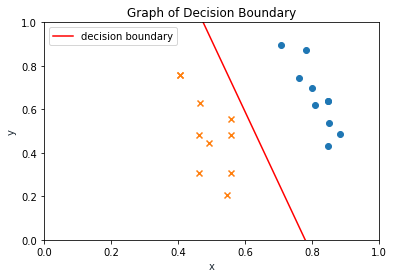

In [70]:
plt_decision_boundary()